In [1]:
%pylab inline

import rpeakdetect
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


### BIOSTREAM

In [15]:
data = pd.read_csv("/Users/user/Downloads/2016-11-28-(10-37-53)-biostream.txt")

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277196 entries, 0 to 277195
Data columns (total 5 columns):
Date           277196 non-null object
Time           277196 non-null object
Seconds        277196 non-null float64
ECG            277196 non-null float64
Respiration    277196 non-null float64
dtypes: float64(3), object(2)
memory usage: 12.7+ MB


In [19]:
data.head()

,Date,Time,Seconds,ECG,Respiration
0,2016/11/28,10:37:53.287,0.000,1.788940,1.644897
1,2016/11/28,10:37:53.287,0.005,2.620544,1.632996
2,2016/11/28,10:37:53.287,0.010,3.174438,1.619263
3,2016/11/28,10:37:53.287,0.015,3.029480,1.602478
4,2016/11/28,10:37:53.287,0.020,2.008667,1.588440


In [20]:
signal = data["ECG"]

In [22]:
len(signal)/200.

1385.98

In [7]:
10*200

2000

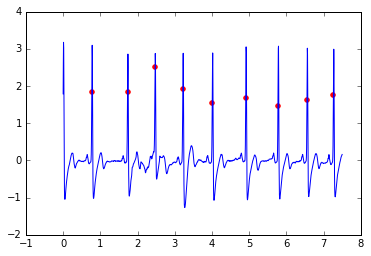

In [41]:
rpeakdetect.plot_peak_detection(signal[:1500], 200)

In [29]:
rpeaks = rpeakdetect.detect_beats(signal, 200)

In [30]:
rpeaks

array([   154,    346,    494, ..., 276811, 276966, 277148])

In [60]:
def get_RR(data, f=200):
    
    rpeaks = rpeakdetect.detect_beats(data["ECG"],f)
    RR = np.array([data["Seconds"][rpeaks[i+1]]-data["Seconds"][rpeaks[i]] for i in range(len(rpeaks)-1)]).astype(float)
    return RR

In [61]:
RR = get_RR(data, 200)

In [69]:
pd.Series(RR).describe()

count    1601.000000
mean        0.865197
std         0.114896
min         0.255000
25%         0.770000
50%         0.865000
75%         0.950000
max         1.120000
dtype: float64